In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
#!pip install tensorflow==2.0.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-04-17 18:47:02--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3036::ac43:b421, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.05s   

2022-04-17 18:47:02 (22.6 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   creating: Mask_RCNN/images/
  inflating: Mask_RCNN/LICENSE       
  inflating: Mask_RCNN/MANIFEST.in 

Using TensorFlow backend.


... done downloading pretrained model!


**Extract** **Image**

In [5]:
# Extract Images
images_path = "/content/drive/MyDrive/SGP6/test.zip"
annotations_path = "/content/drive/MyDrive/SGP6/annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 58 images


In [6]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/SGP6/annotations.json
Annotation json path:  /content/drive/MyDrive/SGP6/annotations.json
Train: 50
Validation: 6
Classes: 1


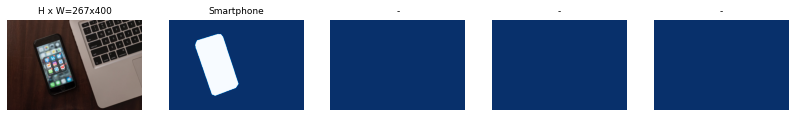

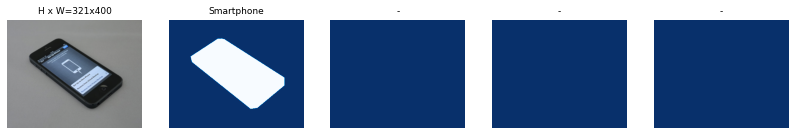

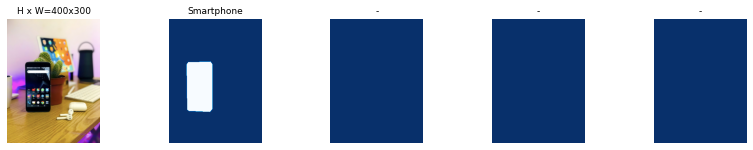

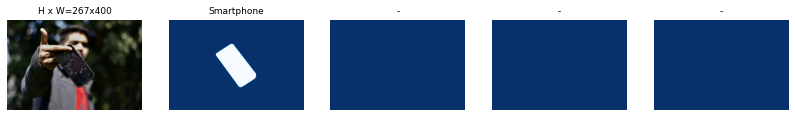

In [7]:
# Load image samples
display_image_samples(dataset_train)

**Training**

In [8]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [9]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220417T1847/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

**Detection**

In [10]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20220417T1847/mask_rcnn_object_0005.h5
Re-starting from epoch 5


**mAP**

original_image           shape: (512, 512, 3)         min:    0.00000  max:  251.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  147.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


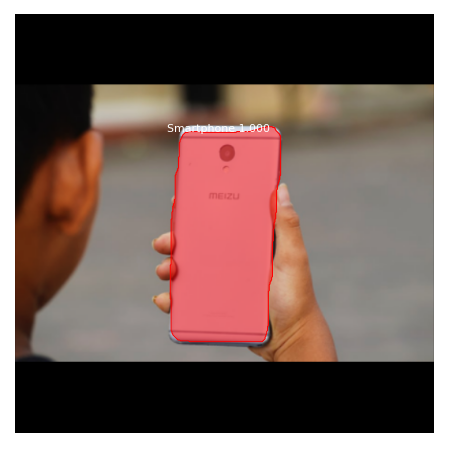

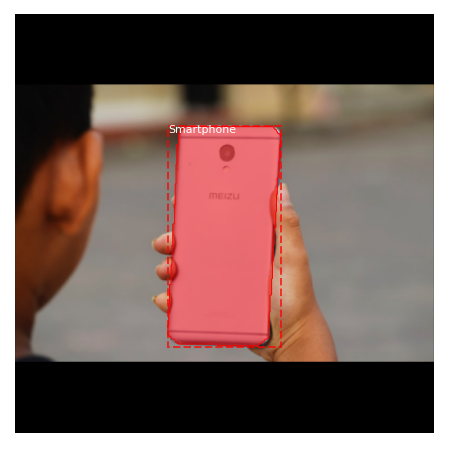

In [13]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

In [17]:
from visualize import random_colors, get_mask_contours, draw_mask

# Load Image
img = cv2.imread("/content/drive/MyDrive/SGP6/randmTest2.jpeg")

test_model, inference_config = load_inference_model(1, "/content/Mask_RCNN/logs/object20220417T1847/mask_rcnn_object_0005.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

Loading weights from  /content/Mask_RCNN/logs/object20220417T1847/mask_rcnn_object_0005.h5
Re-starting from epoch 5


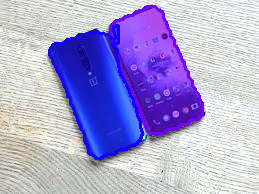

In [18]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

cv2_imshow(img)